# 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!

In [1]:
import xgboost
import lightgbm
import missingno
import sklearn

print(xgboost.__version__)
print(lightgbm.__version__)
print(missingno.__version__)
print(sklearn.__version__)

1.6.2
3.2.1
0.5.1
1.1.1


## ✓ 튜닝해볼 수 있는 모델 클래스 인자


대표적으로 자주 튜닝하는 lightgbm 라이브러리의 인자는 다음과 같습니다.

- max_depth : 의사 결정 나무의 깊이, 정수 사용
- learning_rate : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
- n_estimators : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
- num_leaves : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
- boosting_type : 부스팅 방식, gbdt, rf 등의 문자열 입력

위에서 저는 n_estimators와 max_depth 에 대해서만 아주 간단하게 실험했지만, 훨씬 더 다양하게 실험을 하며 최적의 조합을 찾아볼 수 있습니다.


실제로 lightgbm에 넣을 수 있는 인자는 아래 자료들에서 설명하는 것처럼 매우 다양합니다.

- lightGBM / XGBoost 파라미터 설명
- Chapter 4. 분류 - LightGBM

위의 자료 외에도 lightgbm, xgboost 하이퍼 파라미터 튜닝 키워드로 검색해보면 다양한 하이퍼 파라미터의 종류를 확인할 수 있습니다.

실험 과정에서는 물론 위에서 만들었던 my_GridSearch(), save_submission() 등의 함수를 사용해도 되고, 혹은 여러분이 원하는 새로운 함수를 만들어서 사용해도 됩니다!

## ✓ 시도해볼 수 있는 방법

여러분이 시도해볼 수 있는 방법은 다음과 같은 것들이 있습니다.

- 기존에 있는 데이터의 피처를 모델을 보다 잘 표현할 수 있는 형태로 처리하기 (피처 엔지니어링)
- LGBMRegressor, XGBRegressor, RandomForestRegressor 세 가지 이상의 다양한 모델에 대해 하이퍼 파라미터 튜닝하기
- 다양한 하이퍼 파라미터에 대해 그리드 탐색을 시도해서 최적의 조합을 찾아보기
- Baseline 커널에서 활용했던 블렌딩 방법 활용하기

물론 이 외에도 좋은 아이디어가 있다면 당연히 시도해보는 것도 좋습니다. 

자유롭게 여러 가지 방법을 활용해서 점수를 끌어올려 보세요!


참고로, 진행하면서 도움이 될 수 있는 가장 좋은 자료는 이미 대회를 진행한 사람들이 올려둔 커널입니다.

- https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks


아주 다양하게 데이터를 탐색해 본 커널도 있고, 상위권을 달성한 커널은 오늘 다루지 않은 스태킹 앙상블(stacking ensemble) 등의 기법을 활용한 커널을 활용하기도 합니다. 

한 번씩 구경해보고 다른 사람들은 어떤 전략으로 성능을 끌어올렸는지 공부해보는 것도 매우 좋을 겁니다!

여러 가지 실험을 해보고 결과 csv는 캐글에, 사용한 노트북은 깃허브(GitHub)를 통해 이곳에 제출해 주세요. 

```제출한 노트북에는 본인의 캐글 Submission 스코어를 기재해 주시기 바랍니다```.



그럼, 시작해보죠! 화이팅!!! 💪🏼

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
project_path = os.getenv('HOME') + '/Desktop/house_prices'

In [4]:
training_path = project_path + '/train.csv'
test_path = project_path + '/test.csv'

## Baseline

In [5]:
X =  pd.read_csv(training_path)
y = X.price
del X['id']
del X['price']
X['date'] = X['date'].apply(lambda x : x[:6]).astype(int)
X = X.values

In [6]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [7]:
model = lgb.LGBMRegressor()

In [8]:
def get_score(model, X,y, random_state=2022, test_size = .2) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, test_size=test_size)
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    mse = mean_squared_error(y_test, prediction)
    return mse ** 0.5

In [9]:
get_score(model, X,y)

129853.26965916483

# EDA

In [169]:
df = pd.read_csv(training_path)

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


<AxesSubplot:>

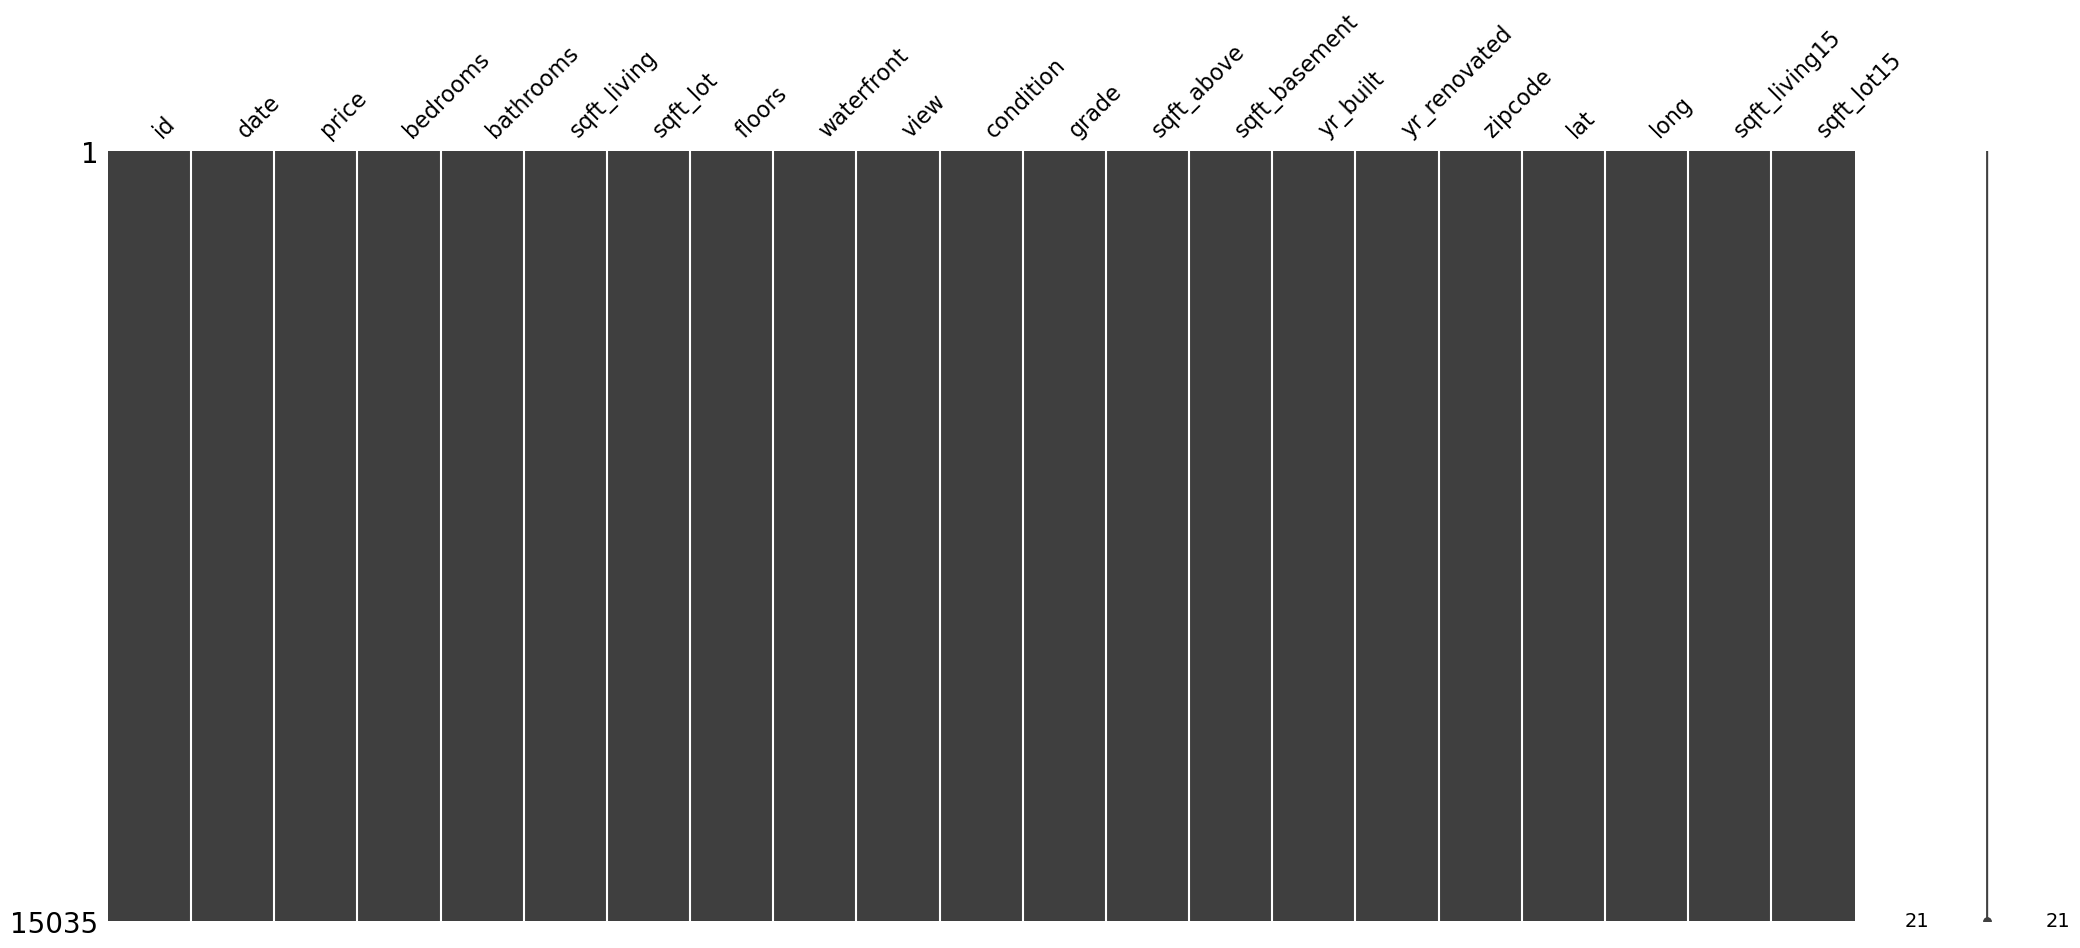

In [12]:
missingno.matrix(df)

In [13]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.dtypes.value_counts()

int64      15
float64     5
object      1
dtype: int64

In [170]:
col_int64 = [df.dtypes.index[i] for i in range(len(df.dtypes)) if df.dtypes[i] == 'int64']
col_float64 = [df.dtypes.index[i] for i in range(len(df.dtypes)) if df.dtypes[i] == 'float64']
col_object = [df.dtypes.index[i] for i in range(len(df.dtypes)) if df.dtypes[i] == 'object']

print('col_int64 : ', col_int64)
print('col_float64 : ', col_float64)
print('col_object : ', col_object)

col_int64 :  ['id', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']
col_float64 :  ['price', 'bathrooms', 'floors', 'lat', 'long']
col_object :  ['date']


In [171]:
col_int64.remove('id')
col_float64.remove('price')

Data fields

- ID : 집을 구분하는 번호 `#flag`
- date : 집을 구매한 날짜 `#flag`
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수 
- bathrooms : 화장실의 수
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수 
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도 #flag : date?
- yr_renovated : 집을 재건축한 년도 
- zipcode : 우편번호 `#flag` 오히려 이게 위도 경도 보다 낳을듯
- lat : 위도 `#flag`
- long : 경도 `#flag`
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

HIGH CORR :

- sqft_living & sqft_above(0.88)

In [18]:
df.corr().style.background_gradient(cmap='YlGn')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020899,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,0.078622,0.073086,-0.050634,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,0.667211,0.608577,0.322218,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176
sqft_lot,-0.034077,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458
floors,0.182848,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287
waterfront,-0.011775,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501
condition,-0.101618,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873


## id

In [172]:
#TODO : TEST DATA
train_id = df['id']
del df['id']
train_id

0            0
1            1
2            2
3            3
4            4
         ...  
15030    15030
15031    15031
15032    15032
15033    15033
15034    15034
Name: id, Length: 15035, dtype: int64

## price

In [173]:
#TODO TEST DATA
y = df['price'].apply(lambda x : np.log1p(x))

In [174]:
y.describe()

count    15035.000000
mean        13.048122
std          0.527471
min         11.264477
25%         12.682310
50%         13.017005
75%         13.377007
max         15.856731
Name: price, dtype: float64

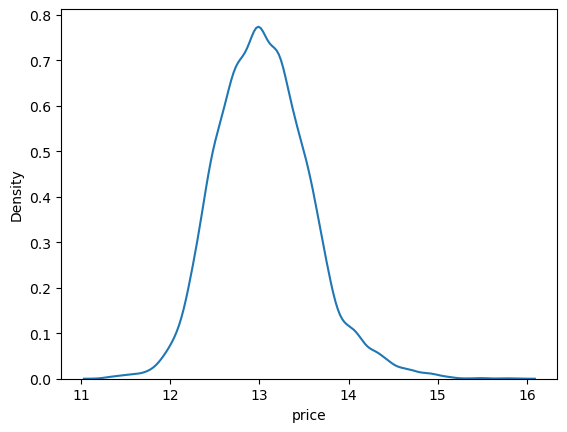

In [175]:
# del df['price']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.kdeplot(y)
# sns.histplot(y)
plt.show()

In [176]:
df[['price']+col_float64].corr()['price'].sort_values(ascending=False)

price        1.000000
bathrooms    0.525479
lat          0.301604
floors       0.262588
long         0.023547
Name: price, dtype: float64

In [177]:
df[['price']+ col_int64].corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702899
grade            0.667211
sqft_above       0.608577
sqft_living15    0.586419
view             0.400806
bedrooms         0.323672
sqft_basement    0.322218
waterfront       0.265738
yr_renovated     0.140808
sqft_lot         0.096793
sqft_lot15       0.086384
yr_built         0.047290
condition        0.039740
zipcode         -0.051498
Name: price, dtype: float64

## date

In [178]:
# TODO : TEST DATA 
df['date'] = df['date'].apply(lambda x : x[:6]).astype(int)
df['year'] = df['date'].apply(lambda x : str(x)[:4]).astype(int)

In [179]:
df.date.describe()

count     15035.000000
mean     201438.545993
std          44.252050
min      201405.000000
25%      201407.000000
50%      201410.000000
75%      201502.000000
max      201505.000000
Name: date, dtype: float64

In [180]:
# TOTOD : TESTDATA AND dummy_variable
df.year.value_counts()

2014    10229
2015     4806
Name: year, dtype: int64

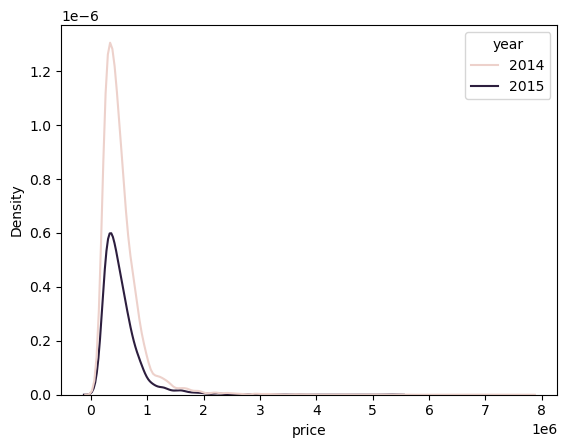

In [181]:
sns.kdeplot(data =df , x='price', hue= 'year')
plt.show()

In [183]:
df['yr_old'] = df['year'] - df['yr_built']

In [184]:
df.loc[(df['yr_old'] <0),['year','yr_built']] #new houses?

,year,yr_built
1264,2014,2015
1920,2014,2015
5303,2014,2015
5654,2014,2015
10110,2014,2015
11890,2014,2015
14428,2014,2015
14484,2014,2015
14563,2014,2015
14776,2014,2015


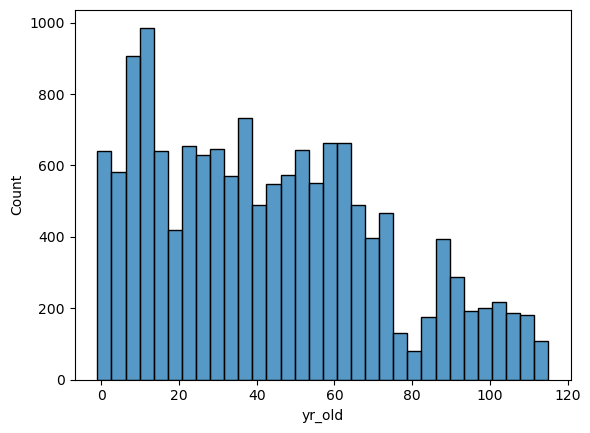

In [185]:
sns.histplot(data =df, x='yr_old')
plt.show()

In [186]:
df[['yr_built','yr_renovated','date']]

,yr_built,yr_renovated,date
0,1955,0,201410
1,1933,0,201502
2,1987,0,201502
3,1995,0,201406
4,1963,0,201501
...,...,...,...
15030,2014,0,201410
15031,2009,0,201503
15032,2009,0,201405
15033,2014,0,201502


## int64 columns 

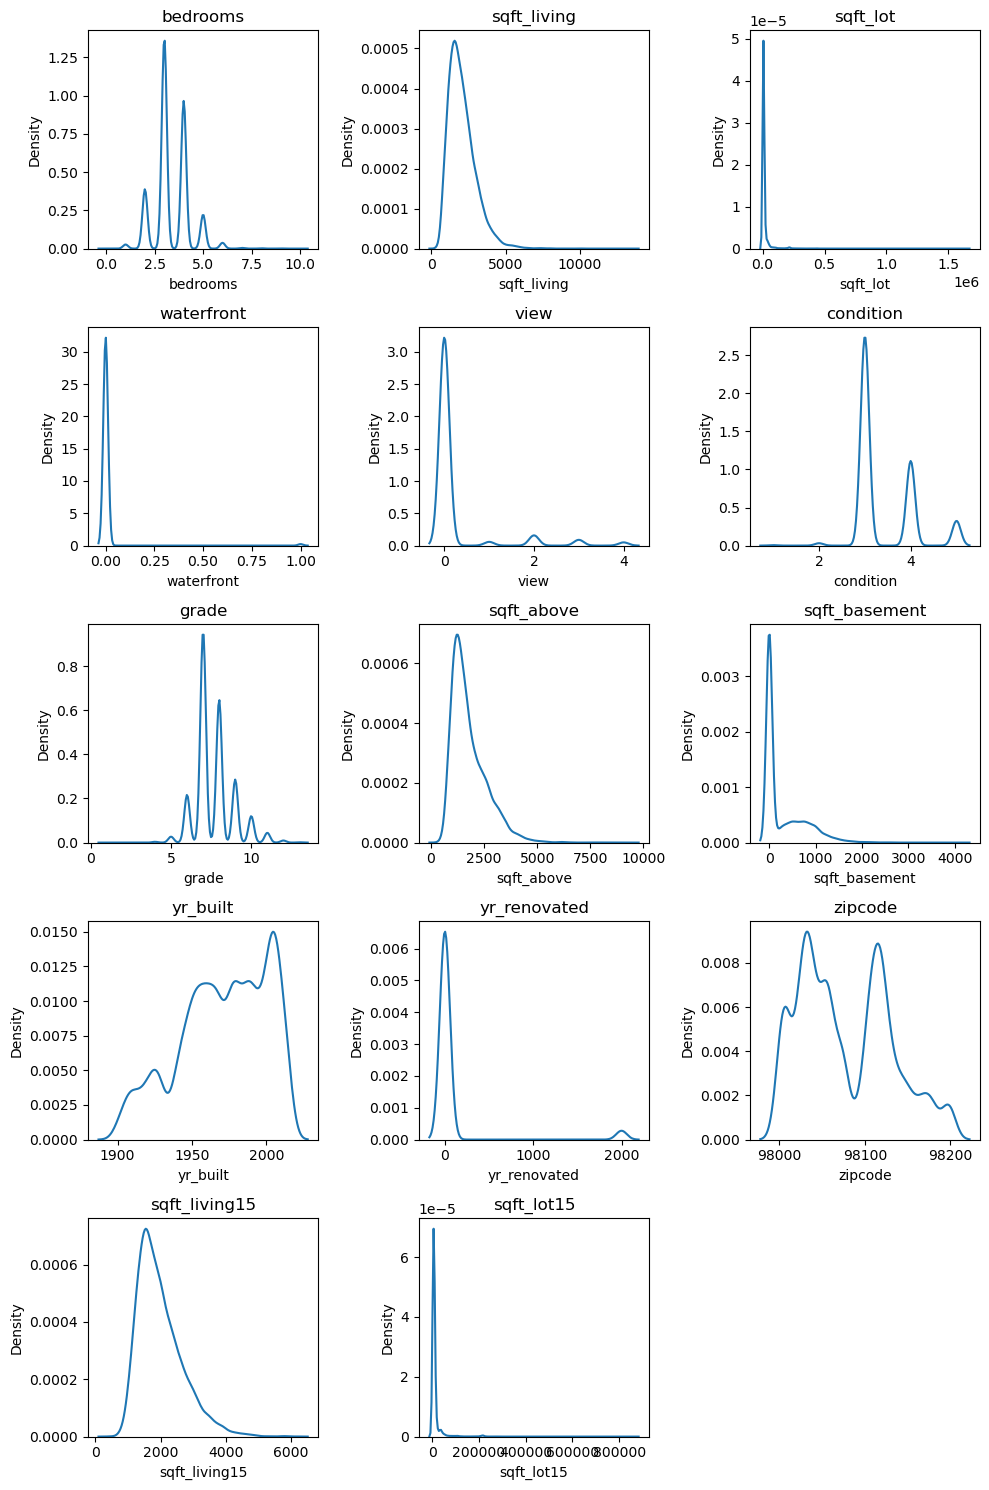

In [205]:
# col_int64.remove('id')
fig = plt.figure(figsize = (10,15))
for i, col in enumerate(col_int64):
    ax = fig.add_subplot(5,3,i+1)
    sns.kdeplot(data= df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [197]:
#check outliers

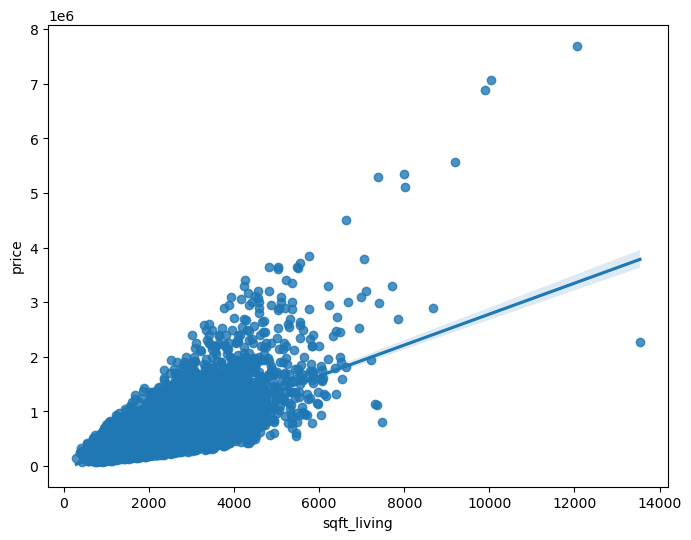

In [208]:
data = pd.concat([df['price'], df['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)

In [206]:
df['sqft_living'].describe()

count    15035.000000
mean      2083.790223
std        922.134087
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2560.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [218]:
drop_index = []
idx = df.loc[df['sqft_living'] > 9000,:].index
df.loc[df['sqft_living'] > 9000,:]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,yr_old
2775,201406,7062500.0,5,4.50,10040,37325,2.0,1,2,3,...,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014,74
3134,201408,5570000.0,5,5.75,9200,35069,2.0,0,0,3,...,3000,2001,0,98039,47.6289,-122.233,3560,24345,2014,13
5108,201410,7700000.0,6,8.00,12050,27600,2.5,0,3,4,...,3480,1910,1987,98102,47.6298,-122.323,3940,8800,2014,104
6469,201409,6885000.0,6,7.75,9890,31374,2.0,0,4,3,...,1030,2001,0,98039,47.6305,-122.240,4540,42730,2014,13
8912,201405,2280000.0,7,8.00,13540,307752,3.0,0,4,3,...,4130,1999,0,98053,47.6675,-121.986,4850,217800,2014,15


In [219]:
drop_index.append(idx)
drop_index

[Int64Index([2775, 3134, 5108, 6469, 8912], dtype='int64')]

### sqrtfoot_above

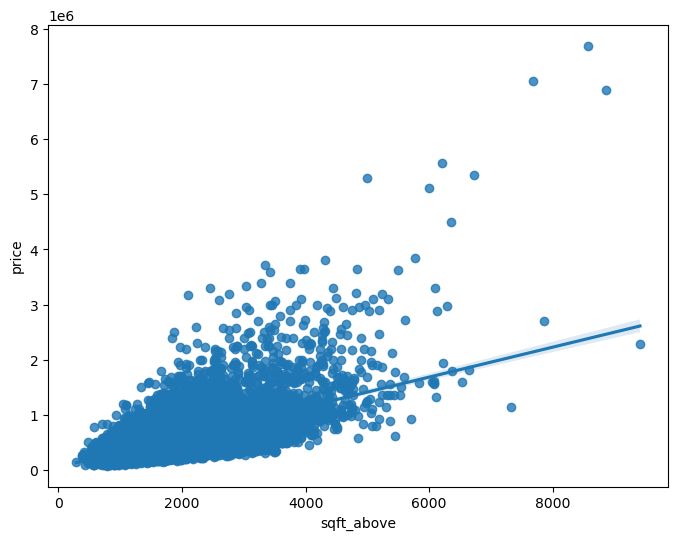

In [220]:
data = pd.concat([df['price'], df['sqft_above']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_above', y="price", data=data)

In [223]:
idx = df.loc[df['sqft_above'] > 8000,:]
drop_index.append(idx)
df.loc[df['sqft_above'] > 8000,:]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,yr_old
5108,201410,7700000.0,6,8.00,12050,27600,2.5,0,3,4,...,3480,1910,1987,98102,47.6298,-122.323,3940,8800,2014,104
6469,201409,6885000.0,6,7.75,9890,31374,2.0,0,4,3,...,1030,2001,0,98039,47.6305,-122.240,4540,42730,2014,13
8912,201405,2280000.0,7,8.00,13540,307752,3.0,0,4,3,...,4130,1999,0,98053,47.6675,-121.986,4850,217800,2014,15


In [226]:
from scipy.stats import skew

In [227]:
skew2 = {}
for i in col_int64 :
    if (skew(df[i]) < -1) or (skew(df[i]) > 1) :
        skew2[i] = {i:skew(df[i])}

print(skew2.keys())

dict_keys(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'])


In [228]:
skew_col = list(skew2.keys())

- Symmetric: Values between -0.5 to 0.5
- Moderated Skewed data: Values between -1 and -0.5 or between 0.5 and 1
- Highly Skewed data: Values less than -1 or greater than 1

https://medium.com/swlh/skewness-and-kurtosis-in-statistics-a0314c8882d7

skewness and kurtosis
https://m.blog.naver.com/yolwooju/222100758577

## float64

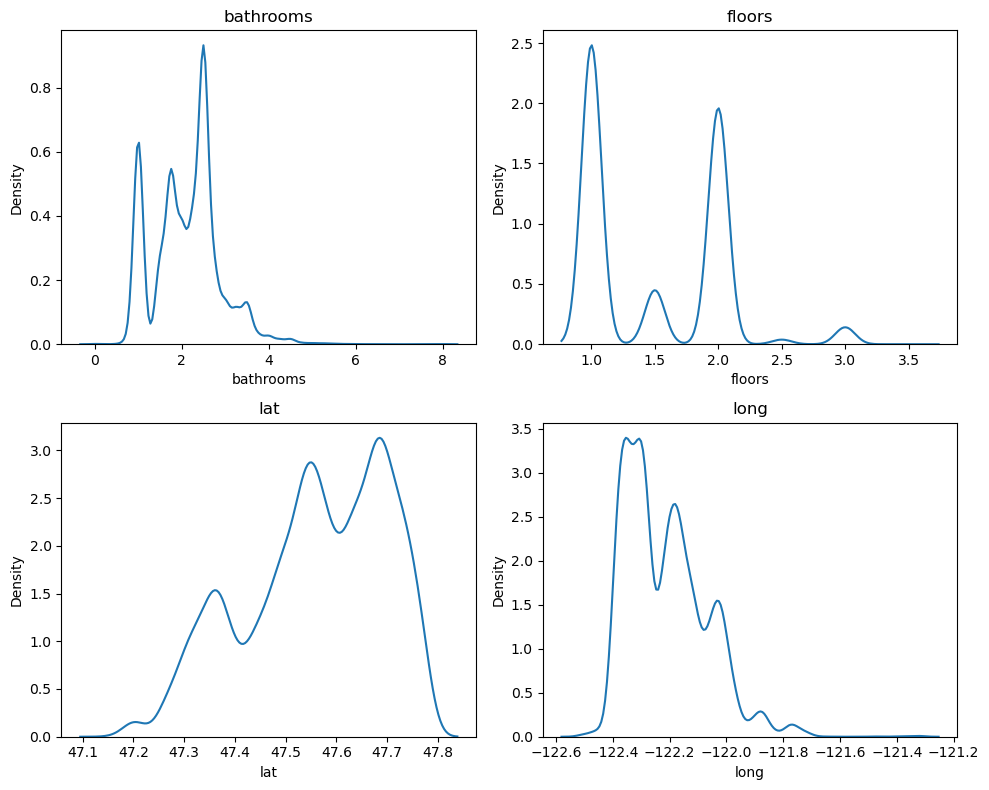

In [41]:
fig = plt.figure(figsize = (10,8))
for i, col in enumerate(col_float64):
    ax = fig.add_subplot(2,2,i+1)
    sns.kdeplot(data= df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [229]:
box_col = ['bathrooms','bedrooms','floors','view', 'waterfront','grade', 'year','date', 'yr_built', 'yr_old'] # min_max

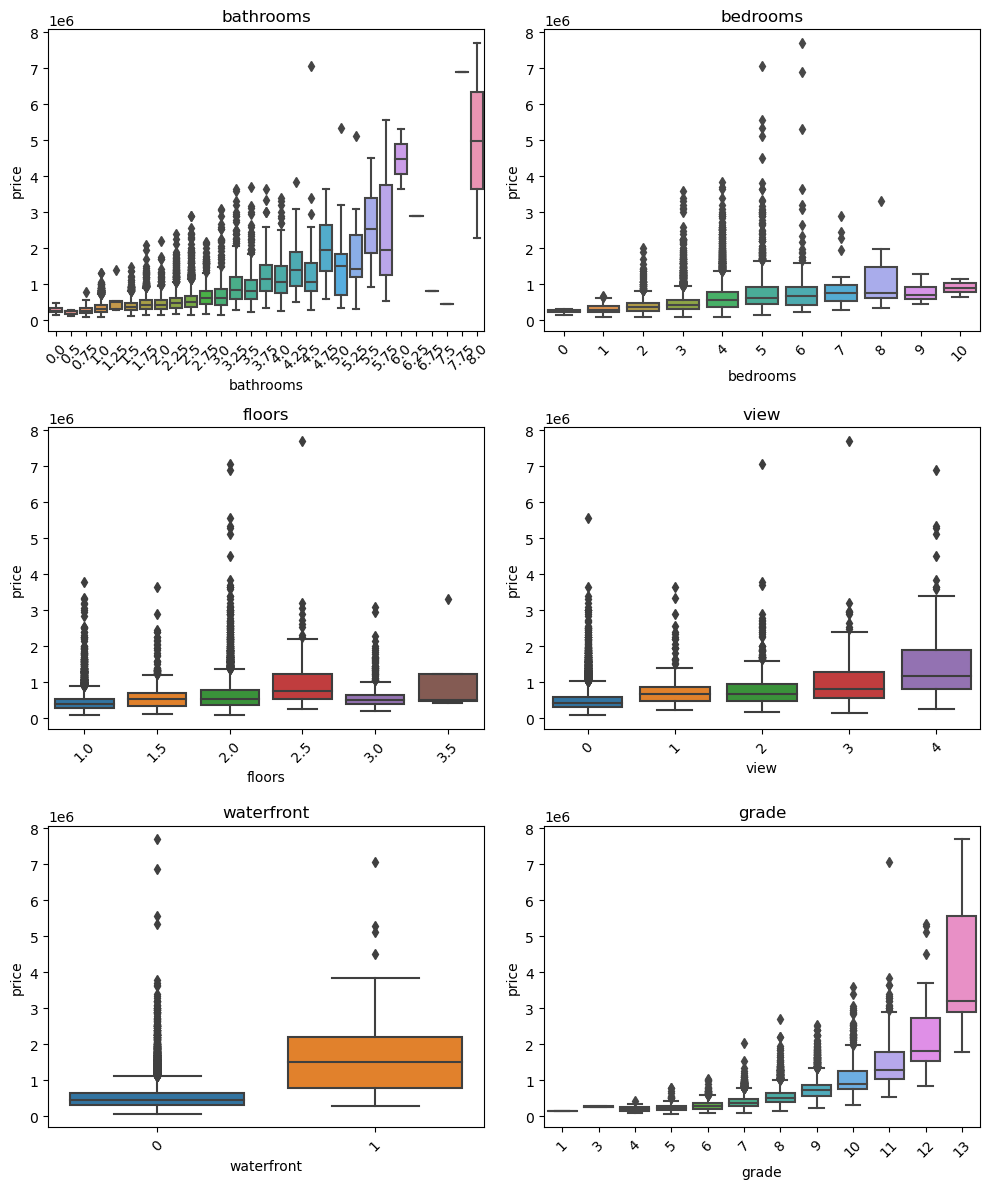

In [44]:
fig = plt.figure(figsize =(10,12))
for i, col in enumerate(box_col[:6]):
    ax = fig.add_subplot(3,2, i+1)
    sns.boxplot(data = df, x = col, y = 'price')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()    

In [191]:
df.corr()['price'].sort_values()

zipcode         -0.051498
yr_old          -0.047161
date             0.007717
year             0.008012
long             0.023547
condition        0.039740
yr_built         0.047290
sqft_lot15       0.086384
sqft_lot         0.096793
yr_renovated     0.140808
floors           0.262588
waterfront       0.265738
lat              0.301604
sqft_basement    0.322218
bedrooms         0.323672
view             0.400806
bathrooms        0.525479
sqft_living15    0.586419
sqft_above       0.608577
grade            0.667211
sqft_living      0.702899
price            1.000000
Name: price, dtype: float64

In [48]:
len(skew_col) # np.log1p

10

In [49]:
len(box_col) #min_max

10

In [50]:
#TODO TEST
# remove_col = ['zipcode','lat', 'long']

In [224]:
all_col = set(df.columns)

In [225]:
all_col - (set(box_col) | set(skew_col) | set(remove_col) )

{'price'}

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [230]:
train = df.copy()
del train['price']

In [231]:
# todo TEST
scaler = MinMaxScaler()
boxdf = pd.DataFrame(train[box_col + ['zipcode','lat','long']])
scaler.fit(boxdf)
boxdf = pd.DataFrame(data = scaler.transform(boxdf), columns = box_col+ ['zipcode','lat','long'])
train.drop(columns =box_col + ['zipcode','lat','long'], inplace=True)
train = pd.concat([train,boxdf], axis=1)
train.head()

,sqft_living,sqft_lot,condition,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,bathrooms,bedrooms,...,view,waterfront,grade,year,date,yr_built,yr_old,zipcode,lat,long
0,1180,5650,3,1180,0,0,1340,5650,0.12500,0.3,...,0.0,0.0,0.500000,0.0,0.05,0.478261,0.517241,0.893939,0.571498,0.217608
1,770,10000,3,770,0,0,2720,8062,0.12500,0.2,...,0.0,0.0,0.416667,1.0,0.97,0.286957,0.715517,0.136364,0.936143,0.237542
2,1680,8080,3,1680,0,0,1800,7503,0.25000,0.3,...,0.0,0.0,0.583333,1.0,0.97,0.756522,0.250000,0.368687,0.741354,0.393688
3,1715,6819,3,1715,0,0,2238,6819,0.28125,0.3,...,0.0,0.0,0.500000,0.0,0.01,0.826087,0.172414,0.010101,0.247386,0.159468
4,1060,9711,3,1060,0,0,1650,9711,0.18750,0.3,...,0.0,0.0,0.500000,1.0,0.96,0.547826,0.456897,0.994949,0.407914,0.169435


In [232]:
for i in skew_col :
    train[i] = train[i].apply(lambda x : np.log1p(x))

In [233]:
# train.drop(columns = remove_col, inplace =True)

In [234]:
train.shape

(15035, 21)

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = .2, random_state=2022)

In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [242]:
random_state= 2022
xgb = XGBRegressor(random_state=random_state)

lgb = LGBMRegressor(max_depth = 6 ,n_estimators = 300, random_state=random_state)
lgb_params = {'n_estimators' : [100,200,300,400], 'max_depth' :[-1,3,6,10]}

rfr = RandomForestRegressor(random_state=random_state)
rfr_params = {'n_estimators' : [100,200,300,400]}

In [239]:
mygrid =GridSearchCV(lgb, param_grid = lgb_params, cv = 5, n_jobs= 5, verbose = 1, scoring= 'neg_mean_squared_error')

In [240]:
mygrid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=LGBMRegressor(max_depth=6, n_estimators=400,
                                     random_state=2022),
             n_jobs=5,
             param_grid={'max_depth': [-1, 3, 6, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error', verbose=1)

In [241]:
params = mygrid.cv_results_['params']
score = mygrid.cv_results_['mean_test_score']
for i in range(len(params)) :
    params[i]['score'] = score[i]

pd.DataFrame(params, index = score).sort_index(ascending=False)

,max_depth,n_estimators,score
-0.026407,6,300,-0.026407
-0.026424,6,400,-0.026424
-0.026477,10,300,-0.026477
-0.026533,-1,400,-0.026533
-0.026542,-1,300,-0.026542
-0.026546,10,200,-0.026546
-0.026561,10,400,-0.026561
-0.026591,-1,200,-0.026591
-0.026595,6,200,-0.026595
-0.027128,-1,100,-0.027128


In [93]:
# sklearn.metrics.get_scorer_names()

In [ ]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('얍💢')

In [ ]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [244]:
y = np.expm1(y)

In [245]:
get_score(lgb, train, y)

121497.81693584681